<a href="https://colab.research.google.com/github/Car-lore/DMA_LABO_Austral_2021_rosario/blob/Laboratorio-II/TP1_Clasificador_de_imagenes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Laboratorio Implementación 2

## Trabajo Práctico 1 - Parte 2

---
## Integrantes:

*   Ciro Couste
*   Alberto Gir Erdmann
*   Carla Menzella
*   Agostina Misaña





### **1. Importo las librerías**



In [1]:
import os
import sys
from google.colab import drive

import numpy as np
from tensorflow.keras.preprocessing.image import load_img,img_to_array
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
import tensorflow.keras.layers as tfl

### **2. Conecto al Google Drive**



In [2]:
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


### **3. Reviso las carpetas dentro de mi carpeta Imágenes**

In [3]:
folder_path='gdrive/MyDrive/imagenesG5/'
os.listdir(folder_path)

['MLA1000', 'MLA1039', 'MLA1051', 'MLA1144']

### **4. Descargo las imágenes en variables locales**

In [4]:
img_width=128
img_height=128
images = []
labels=[]
i=0
clases=[]
for folders in os.listdir(folder_path):
  print ('\r', 'Carpeta ', folders)
  try:
    for img in os.listdir('./{}/{}/'.format(folder_path,folders)):
      img = load_img('./{}/{}/{}'.format(folder_path,folders,img), target_size=(img_width, img_height))
      img = np.asarray(img)
      img = np.expand_dims(img, axis=0)
      images.append(img)
      labels.append(folders)
      i+=1
      print('\r', i, end='')
  except:
        print('Error en el archivo {}'.format(folders))
images = np.vstack(images)

 Carpeta  MLA1000
 Carpeta  MLA1039
 Carpeta  MLA1051
 Carpeta  MLA1144
 6841

### **5. Exploramos nuestro dataset**  


In [5]:
images.shape

(6841, 128, 128, 3)

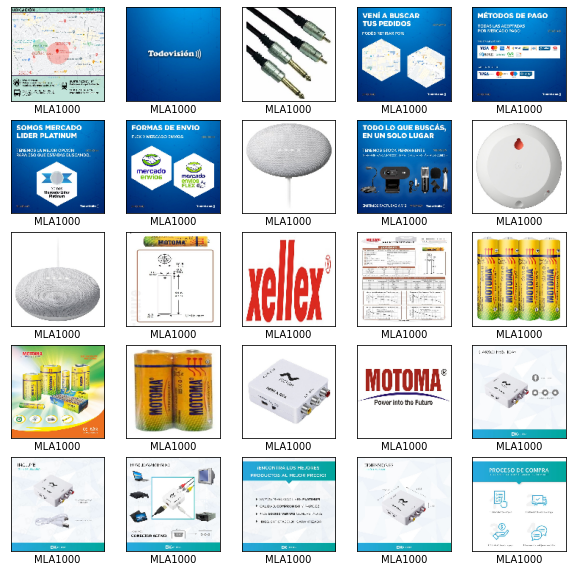

In [6]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(images[i], cmap=plt.cm.binary)
    plt.xlabel(labels[i])
plt.show()

#### Controlo que estén todas las categorías

In [7]:
list(set(labels))

['MLA1039', 'MLA1000', 'MLA1051', 'MLA1144']

### Al tener 4 categorías, utilizo OneHotEnconder para codificar


In [8]:
encoder=OneHotEncoder()
encoder.fit(np.array(labels).reshape(-1,1))
y=encoder.transform(np.array(labels).reshape(-1,1))
X=images/255.

In [9]:
y.todense()

matrix([[1., 0., 0., 0.],
        [1., 0., 0., 0.],
        [1., 0., 0., 0.],
        ...,
        [0., 0., 0., 1.],
        [0., 0., 0., 1.],
        [0., 0., 0., 1.]])

### Elimino las variables labels e images para ahorrar memoria

In [10]:
del labels,images

### Genero los datasets de train y test

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [12]:
X_train.shape

(4583, 128, 128, 3)

In [13]:
X_test.shape

(2258, 128, 128, 3)

In [14]:
y_train.shape

(4583, 4)

In [15]:
y_test.shape

(2258, 4)

In [16]:
y_test.todense()

matrix([[1., 0., 0., 0.],
        [0., 1., 0., 0.],
        [0., 0., 1., 0.],
        ...,
        [0., 1., 0., 0.],
        [0., 1., 0., 0.],
        [1., 0., 0., 0.]])

## Modelo 1

In [17]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(32, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(32, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(100,activation='relu'))
model.add(layers.Dense(4,activation='softmax'))

In [18]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 126, 126, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 63, 63, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 61, 61, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 30, 30, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 28, 28, 32)        9248      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 6272)              0

In [19]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.CategoricalCrossentropy(),
              metrics=['accuracy'])

In [20]:
y_train=y_train.todense()
y_test=y_test.todense()

In [21]:
history = model.fit(X_train, y_train, epochs=7,
                    validation_data=(X_test,y_test))

Epoch 1/7
144/144 [==============================] - 93s 642ms/step - loss: 1.2458 - accuracy: 0.4126 - val_loss: 1.0850 - val_accuracy: 0.5283
Epoch 2/7
144/144 [==============================] - 91s 635ms/step - loss: 0.9845 - accuracy: 0.5774 - val_loss: 0.9505 - val_accuracy: 0.5965
Epoch 3/7
144/144 [==============================] - 91s 632ms/step - loss: 0.7665 - accuracy: 0.6937 - val_loss: 0.8740 - val_accuracy: 0.6563
Epoch 4/7
144/144 [==============================] - 92s 638ms/step - loss: 0.5761 - accuracy: 0.7750 - val_loss: 0.8452 - val_accuracy: 0.6789
Epoch 5/7
144/144 [==============================] - 91s 631ms/step - loss: 0.3962 - accuracy: 0.8525 - val_loss: 0.9346 - val_accuracy: 0.6873
Epoch 6/7
144/144 [==============================] - 94s 654ms/step - loss: 0.2829 - accuracy: 0.8992 - val_loss: 0.9865 - val_accuracy: 0.7033
Epoch 7/7
144/144 [==============================] - 92s 636ms/step - loss: 0.2289 - accuracy: 0.9247 - val_loss: 1.1346 - val_accuracy:

### Graficamos los resultados

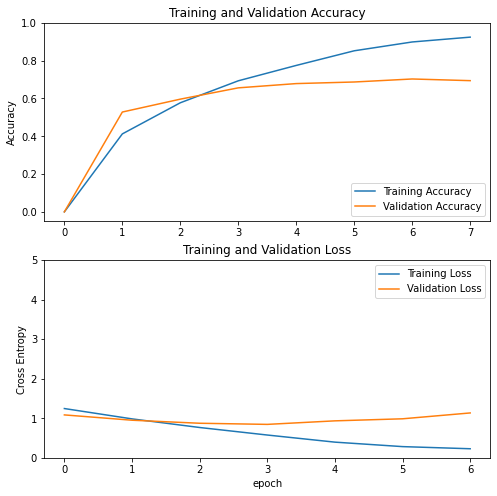

In [22]:
acc = [0.] + history.history['accuracy']
val_acc = [0.] + history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
plt.ylim([0,5.0])
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()

Nos encontramos con que la exactitud sobre el set de datos de testing es  menor que la exactitud sobre los datos de entrenamiento. Esta diferencia entre el entrenamiento y el test se debe al overfitting (sobre ajuste). 

## Modelo 2

In [38]:
model2 = models.Sequential()
model2.add(layers.Conv2D(64, (3, 3), activation='relu', input_shape=(128, 128, 3)))
model2.add(layers.MaxPooling2D((3, 3)))
model2.add(layers.Conv2D(64, (3, 3), activation='relu'))
model2.add(layers.MaxPooling2D((3, 3)))
model2.add(layers.Conv2D(64, (3, 3), activation='relu'))
model2.add(layers.MaxPooling2D((3, 3)))
model2.add(layers.Flatten())
model2.add(layers.Dense(100,activation='relu'))
model2.add(layers.Dense(4,activation='softmax'))

In [39]:
model2.summary()

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_32 (Conv2D)           (None, 126, 126, 64)      1792      
_________________________________________________________________
max_pooling2d_25 (MaxPooling (None, 42, 42, 64)        0         
_________________________________________________________________
conv2d_33 (Conv2D)           (None, 40, 40, 64)        36928     
_________________________________________________________________
max_pooling2d_26 (MaxPooling (None, 13, 13, 64)        0         
_________________________________________________________________
conv2d_34 (Conv2D)           (None, 11, 11, 64)        36928     
_________________________________________________________________
max_pooling2d_27 (MaxPooling (None, 3, 3, 64)          0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 576)             

In [40]:
model2.compile(optimizer='adam',
              loss=tf.keras.losses.CategoricalCrossentropy(),
              metrics=['accuracy'])

In [41]:
history2 = model2.fit(X_train, y_train, epochs=5,
                    validation_data=(X_test,y_test))

Epoch 1/5
144/144 [==============================] - 114s 791ms/step - loss: 1.3413 - accuracy: 0.3496 - val_loss: 1.2500 - val_accuracy: 0.4265
Epoch 2/5
144/144 [==============================] - 112s 778ms/step - loss: 1.1731 - accuracy: 0.4611 - val_loss: 1.1634 - val_accuracy: 0.4553
Epoch 3/5
144/144 [==============================] - 112s 780ms/step - loss: 1.0315 - accuracy: 0.5518 - val_loss: 1.0373 - val_accuracy: 0.5350
Epoch 4/5
144/144 [==============================] - 112s 781ms/step - loss: 0.9165 - accuracy: 0.6149 - val_loss: 0.9391 - val_accuracy: 0.5917
Epoch 5/5
144/144 [==============================] - 113s 782ms/step - loss: 0.8099 - accuracy: 0.6738 - val_loss: 0.8901 - val_accuracy: 0.6306


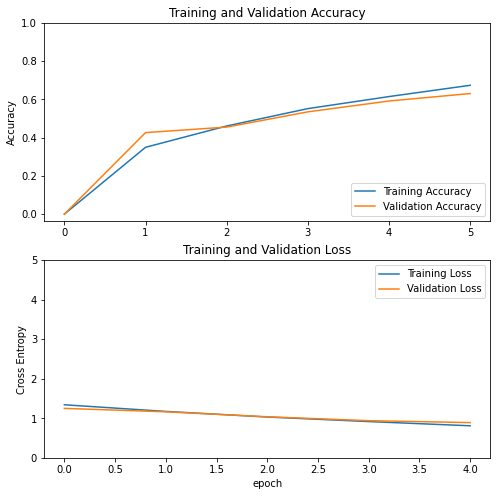

In [42]:
acc2 = [0.] + history2.history['accuracy']
val_acc2 = [0.] + history2.history['val_accuracy']

loss2 = history2.history['loss']
val_loss2 = history2.history['val_loss']

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc2, label='Training Accuracy')
plt.plot(val_acc2, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss2, label='Training Loss')
plt.plot(val_loss2, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
plt.ylim([0,5.0])
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()

## **3) Ensayamos otras arquitecturas con redes ya entrenadas**

In [43]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.callbacks import EarlyStopping

new_model = Sequential()
new_model.add(ResNet50(include_top=False, weights='imagenet', pooling='avg'))
new_model.add(tfl.Dense(y_train.shape[1], activation='softmax',trainable=True))
new_model.compile(optimizer='rmsprop',loss='categorical_crossentropy', metrics=['accuracy'])
new_model.summary()

94781440/94765736 [==============================] - 1s 0us/step
Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
resnet50 (Functional)        (None, 2048)              23587712  
_________________________________________________________________
dense_8 (Dense)              (None, 4)                 8196      
Total params: 23,595,908
Trainable params: 23,542,788
Non-trainable params: 53,120
_________________________________________________________________


In [44]:
#Cargamos un preprocesador del modelo
preprocess_input = tf.keras.applications.resnet50.preprocess_input

In [45]:
def modelResnet(image_shape=(128,128)):
    input_shape = image_shape + (3,)
    base_model = tf.keras.applications.ResNet50(input_shape=input_shape,
                                                   include_top=False, # <== Sacamos la última capa
                                                   weights='imagenet') # From imageNet
    
    # Freeze the base model by making it non trainable
    base_model.trainable = False 

    # create the input layer (Same as the imageNetv2 input size)
    inputs = tf.keras.Input(shape=input_shape)
    
    # data preprocessing using the same weights the model was trained on
    x = preprocess_input(inputs) 
    
    # set training to False to avoid keeping track of statistics in the batch norm layer
    x = base_model(x, training=False) 
    
    # Add the new Binary classification layers
    # use global avg pooling to summarize the info in each channel
    x = tfl.GlobalAveragePooling2D()(x) 

    x = tfl.Dense(100)(x)
    
    #include dropout with probability of 0.2 to avoid overfitting
    x = tfl.Dropout(0.2)(x)
        
    # create a prediction layer with one neuron (as a classifier only needs one)
    prediction_layer = tfl.Dense(4,activation='softmax')
    
    outputs = prediction_layer(x) 
    model = tf.keras.Model(inputs, outputs)
    
    return model

In [46]:
model2 = modelResnet()

In [47]:
base_learning_rate = 0.01
model2.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=base_learning_rate),
              loss=tf.keras.losses.CategoricalCrossentropy(from_logits=False),
              metrics=['accuracy'])

In [48]:
model2.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 128, 128, 3)]     0         
_________________________________________________________________
tf.__operators__.getitem (Sl (None, 128, 128, 3)       0         
_________________________________________________________________
tf.nn.bias_add (TFOpLambda)  (None, 128, 128, 3)       0         
_________________________________________________________________
resnet50 (Functional)        (None, 4, 4, 2048)        23587712  
_________________________________________________________________
global_average_pooling2d (Gl (None, 2048)              0         
_________________________________________________________________
dense_9 (Dense)              (None, 100)               204900    
_________________________________________________________________
dropout (Dropout)            (None, 100)               0     

In [ ]:
new_model.fit(X_train, y_train, validation_data=(X_test,y_test),batch_size=20, epochs=5, verbose=1)

Epoch 1/5
230/230 [==============================] - 1376s 6s/step - loss: 1.7378 - accuracy: 0.3757 - val_loss: 486.5759 - val_accuracy: 0.2077
Epoch 2/5
191/230 [=======================>......] - ETA: 3:33 - loss: 1.4136 - accuracy: 0.3984